### 非監督式學習-降維

#### 降維 (Dimension Reduction)
一般資料常見的表示方法有一維(數線)、二維(XY平面)和三維(XYZ立體)。當大於三維的資料就難以視覺化呈現，那麼我們該如何表示高維度的資料同時又不能壓縮原本資料間彼此的關連性呢？這時降維就能幫助你了！降維顧名思義，就是原本的資料處於在一個比較高的維度作標上，我們希望找到一個低維度的作標來描述它，但又不能失去資料本身的特質。

#### 為什麼要降維?
如果我們能夠把一些資料做壓縮，同時又能夠保持資料原來的特性。因此我們可以用比較少的空間，或是計算時用比較少的資源就可以得到跟沒有做資料壓縮之前得到相似的結果。此外資料降維可以幫助我們進行資料視覺化，二維可以用平面圖表示、三維可以用立體圖作表示，而大於三維的空間難以視覺化做呈現。

#### Principal component analysis (主成分分析, PCA)
主成份分析(Principal component analysis, PCA)。其主要目的是把高維的點頭影到低維的空間上，並且低維度的空間保有高維空間中大部分的性質。透過將一個具有 n 個特徵空間的樣本，轉換為具有 k 個特徵空間的樣本，其中 k 必定要小於 n。此外 PCA 只允許線性的轉換。如下圖所示，我們將捐尾花朵資料集進行 PCA 降維。將原有四個特徵分別有花瓣與花萼的長與寬，透過線性轉換成兩維並投射在平面上。我們可以發現三種花的類別在平面上各自都有線性的趨勢，也就是圖中紅色的線條。\
圖片 : https://github.com/andy6804tw/2021-13th-ironman/blob/main/7.%E9%9D%9E%E7%9B%A3%E7%9D%A3%E5%BC%8F%E5%AD%B8%E7%BF%92-%E9%99%8D%E7%B6%AD/image/img7-5.png

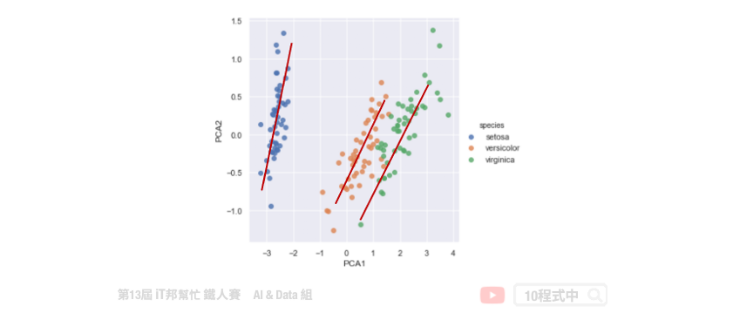

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(13,10))  #新增畫布,設定大小
plt.imshow(plt.imread("D:/github/圖片/img7-5.png")) 
plt.axis('off') #關閉座標
plt.show()

#### PCA的主要步驟
首先一開始先求出所有資料點中心 µ，也就是將每一個資料點的平均。\
接著將每一個資料點減去 µ，也就是做資料點的平移，平移後原點是所有點的中心。\
第三步計算特徵協方差矩陣，其中矩陣對角線上分別是每個特徵的方差，而非對角線上的數值是不同特徵間彼此的協方差。協方差是衡量兩個變數同時變化的變化程度，協方差絕對值越大兩者對彼此的影響越大。\
第四步驟對矩陣進行特徵值分解，計算協方差矩陣的特徵向量和特徵值並選取特徵向量。\
第五步驟將特徵值由小到大排序，並選取其中最大的 k 個特徵。然後將這些 k 個特徵向量作為特徵向量矩陣。最後對資料集中的每一個特徵轉換為新的特徵。

*   先求出所有資料點中心 µ
*   將每一個資料點減去 µ
*   計算特徵的協方差矩陣
*   對矩陣進行特徵值分解
*   取出最大的 k 個特徵值對應的特徵向量
*   將資料點投影到選取的特徵向量上

#### T-Distributed Stochastic Neighbor Embedding (t-SNE)
t-SNE 目標跟 PCA 是一樣的，它們都希望把高維的資料投影到低維中，並且保留高維中的點與點之間的關係與特性。\
兩者不同的點在於 t-SNE 允許非線性的轉換。因為 t-SNE 使用了更複雜的公式來表達高維與低維之間的關係。主要是將高維的數據用高斯分佈的機率密度函數近似，而低維數據的部分使用 t 分佈的方式來近似。\
圖片 : https://github.com/andy6804tw/2021-13th-ironman/blob/main/7.%E9%9D%9E%E7%9B%A3%E7%9D%A3%E5%BC%8F%E5%AD%B8%E7%BF%92-%E9%99%8D%E7%B6%AD/image/img7-6.png


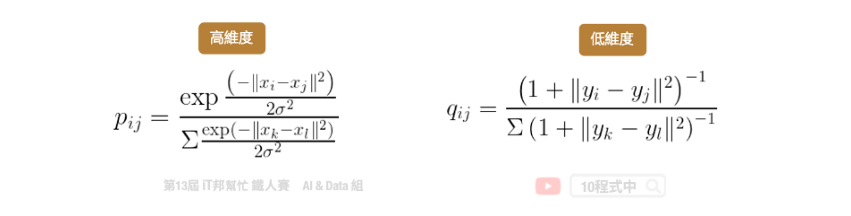

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))  #新增畫布,設定大小
plt.imshow(plt.imread("D:/github/圖片/img7-6.png")) 
plt.axis('off') #關閉座標
plt.show()

#### PCA & t-SNE 整理
PCA和t-SNE是兩個不同降維的方法，PCA的優點在於簡單，<font color = orange>**若新的點要映射時直接代入公式即可得出降維後的點**</font>。若t-SNE有新的點近來時我們沒有去計算新的點和舊的點之間的關係因此 我們無法將新的點投影下去。\
t-SNE的優點是可以保留原本高維距離較遠的點降維後依然保持較遠的距離，因此這些<font color = orange>**群降維後依然保持群的特性**</font>。\
*   PCA允許線性的轉換
*   t-SNE允許非線性的轉換

#### 程式實作

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [11]:
iris = load_iris()
df_data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species'])

In [13]:
from sklearn.model_selection import train_test_split
X = df_data.drop(labels=['Species'],axis=1).values # 移除Species並取得剩下欄位資料
y = df_data['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print('train shape:', X_train.shape)
print('test shape:', X_test.shape)

train shape: (105, 4)
test shape: (45, 4)


*** 
## PCA
Parameters:

*   n_components: 指定PCA降維後的特徵維度數目。
*   whiten: 是否進行白化True/False。白化意指，對降維後的數據的每個特徵進行正規化，即讓方差都為1、平均值為0。默認值為False。
*   random_state: 亂數種子，設定常數能夠保證每次PCA結果都一樣。
*   iterated_power : 冪方法的迭代次數, 可輸入 'auto' 或 [0,無限大)

Attributes:

*   explainedvariance： array類型。降維後的各主成分的方差值，主成分方差值越大，則說明這個主成分越重要
*   explained_varianceratio： array類型。降維後的各主成分的方差值佔總方差值的比例，主成分所佔比例越大，則說明這個主成分越重要。
*   ncomponents： int類型。返回保留的特徵個數。

Methods:

*   fit(X,y)：把數據放入模型中訓練模型。
*   fit_transform(X,[,y])all：訓練模型同時返回降維後的數據。
*   transform(X)：對於訓練好的數據降維。

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, iterated_power=1) 
train_reduced = pca.fit_transform(X_train)

print('PCA方差比: ',pca.explained_variance_ratio_)
print('PCA方差值:',pca.explained_variance_)

PCA方差比:  [0.92390396 0.05371612]
PCA方差值: [4.38034545 0.25467493]


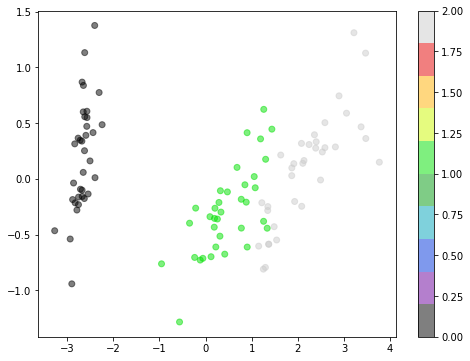

In [15]:
plt.figure(figsize=(8,6))
plt.scatter(train_reduced[:, 0], train_reduced[:, 1], c=y_train, alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))

plt.colorbar()
plt.show()

##### test 做PCA後的結果

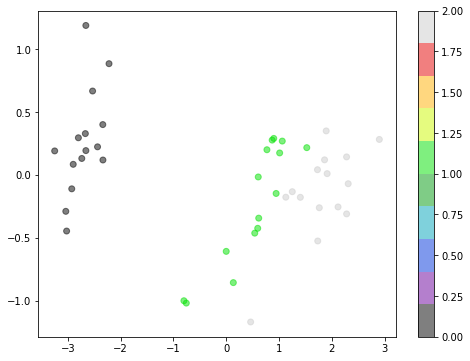

In [16]:
test_reduced = pca.transform(X_test)

plt.figure(figsize=(8,6))
plt.scatter(test_reduced[:, 0], test_reduced[:, 1], c=y_test, alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))

plt.colorbar()
plt.show()

#### 其他種類 PCA
*   KernelPCA

    -   KernelPCA模型類似於非線性支持向量機，使用核技巧處理非線性數據的降維，主要是選擇合適的核函數。
    
<br />

*   IncrementalPCA
    -   IncrementalPCA模型主要是為了解決計算機內存限制問題。工業上樣本量和維度都是非常大的，如果直接擬合數據，機器性能一般都無法支撐。IncrementalPCA則會將數據分成多個batch，然後對每個batch依次遞增調用partial_fit函數對樣本降維。

<br />

*   SparsePCA
    -   SparsePCA模型相較於普通的PCA區別在於使用了L1正則化，即對非主成分的影響降為0，避免了噪聲對降維的影響。

<br />

*   MiniBatchSparsePCA
    -   MiniBatchSparsePCA模型類似於SparsePCA，不同之處在於MiniBatchSparsePCA模型通過使用一部分樣本特徵和給定的迭代次數進行降維，以此來解決特徵分解過慢的問題。

---

## t-SNE
t-SNE使用了更複雜的公式來表達高維與低維之間的關係。且能夠允許非線性的轉換。

Parameters:

*   n_components: 指定t-SNE降維後的特徵維度數目。
*   n_iter: 設定迭代次數。
*   random_state: 亂數種子，設定常數能夠保證每次t-SNE結果都一樣。

Attributes:

*   explainedvariance： array類型。降維後的各主成分的方差值，主成分方差值越大，則說明這個主成分越重要
*   explained_varianceratio： array類型。降維後的各主成分的方差值佔總方差值的比例，主成分所佔比例越大，則說明這個主成分越重要。
*   ncomponents： int類型。返回保留的特徵個數。

Methods:

*   fit(X,y)：把數據放入模型中訓練模型。
*   fit_transform(X)：訓練模型同時返回降維後的數據。
*   transform(X)：對於訓練好的數據降維。

In [18]:
from sklearn.manifold import TSNE

tsneModel = TSNE(n_components=2, random_state=42,n_iter=1000)
train_reduced = tsneModel.fit_transform(X_train)

c:\Users\bluesky\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\bluesky\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


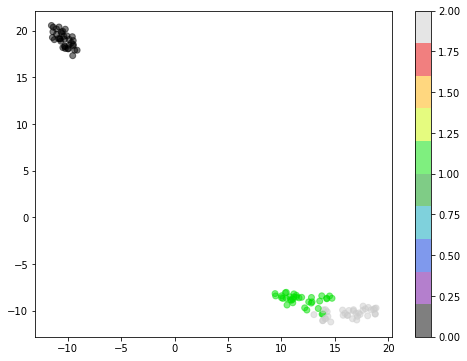

In [19]:
plt.figure(figsize=(8,6))
plt.scatter(train_reduced[:, 0], train_reduced[:, 1], c=y_train, alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))

plt.colorbar()
plt.show()

####  t-SNE 不適用於新資料
PCA 降維可以適用新資料，可呼叫transform() 函式即可。而 t-SNE 則不行。因為演算法的關係在 scikit-learn 套件中的 t-SNE 演算法並沒有transform() 函式可以呼叫。